In [1]:
import glam
import pandas as pd
import numpy as np
import os.path

import matplotlib.pyplot as plt
from analysis_functions import make_sure_path_exists

In [2]:
make_sure_path_exists('results/estimates')
make_sure_path_exists('results/dic')
make_sure_path_exists('results/predictions')

In [3]:
np.random.seed(23) # from random.org

# 2.1 GLAM Individual Fits

## Load data

In [4]:
# Load data
data = pd.read_csv('data/FF2018_data/GlamDataFF2018_Like.csv')
# Subset only necessary columns
data = data[['subject', 'trial', 'choice', 'rt',
         'item_value_0', 'item_value_1',
         'gaze_0', 'gaze_1']]
data.head()

,subject,trial,choice,rt,item_value_0,item_value_1,gaze_0,gaze_1
0,0,0,0,2009,0,5,0.568396,0.431604
1,0,1,0,3371,5,4,0.762332,0.237668
2,0,2,1,1700,0,5,0.446809,0.553191
3,0,3,1,7466,1,2,0.532352,0.467648
4,0,4,1,1889,5,5,0.529736,0.470264


## Fit GLAM variants individually

### 1. full GLAM

In [8]:
# Fitting full GLAM
print('Fitting full GLAM individually...')

glam_full = glam.GLAM(data)
glam_full.make_model('individual', gamma_bounds=(-1, 1), t0_val=0)

if not os.path.exists('results/estimates/glam_full_individual_like.npy'):
    glam_full.fit(method='NUTS', tune=1000)
else:
    print('  Found old parameter estimates in "results/estimates". Skipping estimation...')
    glam_full.estimates = np.load('results/estimates/glam_full_individual_like.npy')
    
# Save parameter estimates
np.save('results/estimates/glam_full_individual_like.npy', glam_full.estimates)

Fitting full GLAM individually...
Generating single subject models for 33 subjects...
  Found old parameter estimates in "results/estimates". Skipping estimation...


In [49]:
estimates_like = pd.DataFrame(glam_full.estimates)
estimates_like.to_csv("results/params_estimates/params_indiv_like.csv")

In [10]:
glam_full.model


In [46]:
glam_full.model

not isinstance(glam_full.model, list)

False

In [33]:
# save the environment using shelve
import shelve
individual_fit_like_db = shelve.open('individual_fit_like')
individual_fit_like_db['data'] = glam_full.data
individual_fit_like_db['estimate'] = glam_full.estimates
individual_fit_like_db['model'] = glam_full.model
individual_fit_like_db['n_items'] = glam_full.n_items
individual_fit_like_db['trace'] = glam_full.trace

error: [Errno 79] Inappropriate file type or format

In [13]:
#Save the environment (to avoid repetition of the modelling steps)
import pickle
object_glam = glam_full
file_glam = open('individual_fit_like.obj', 'w')
pickle.dump(object_glam, file_glam)

AttributeError: Can't pickle local object 'make_subject_model.<locals>.lda_logp'

In [11]:
pymc3

NameError: name 'pymc3' is not defined

In [9]:
#  # Compute DICs
#  print('Computing DIC scores for full model...')
#  if not os.path.exists('results/dic/glam_full.npy'):
#      # Note: DIC computation does not work for ADVI fitted models
#      glam_full.compute_dic()
#  else:
#      print('  Found old DIC scores in "results/dic". Skipping DIC computation...')
#      glam_full.dic = np.load('results/dic/glam_full.npy')
#  
#  # Save DIC scores
#  np.save('results/dic/glam_full.npy', glam_full.dic)

Computing DIC scores for full model...


AttributeError: module 'pymc3' has no attribute 'dic'

In [11]:
# Predictions
print('Predicting individual subject data using full GLAM...')

if not os.path.exists('results/predictions/glam_full_individual_like.csv'):
    glam_full.predict(n_repeats=50)
    glam_full.prediction.to_csv('results/predictions/glam_full_individual_like.csv', index=False)
else:
    print('  Found old individual full GLAM predictions in "results/predictions". Skipping prediction...')
    glam_full.prediction = pd.read_csv('results/predictions/glam_full_individual_like.csv')

glam_full.prediction.head()

Predicting individual subject data using full GLAM...


,choice,repeat,rt,subject,trial,item_value_0,gaze_0,item_value_1,gaze_1
0,0.0,0.0,4310.0,0.0,0.0,0,0.568396,5,0.431604
1,0.0,1.0,1625.0,0.0,0.0,0,0.568396,5,0.431604
2,0.0,2.0,3983.0,0.0,0.0,0,0.568396,5,0.431604
3,1.0,3.0,3738.0,0.0,0.0,0,0.568396,5,0.431604
4,0.0,4.0,2593.0,0.0,0.0,0,0.568396,5,0.431604


### 2 No-bias $(\gamma=1)$ GLAM

In [8]:
# Fitting no-bias GLAM
print('Fitting no-bias GLAM individually...')

glam_nobias = glam.GLAM(data)
glam_nobias.make_model('individual', gamma_val=1, t0_val=0)

if not os.path.exists('results/estimates/glam_nobias_individual.npy'):
    glam_nobias.fit(method='NUTS', tune=1000)
else:
    print('  Found old parameter estimates in "results/estimates". Skipping estimation...')
    glam_nobias.estimates = np.load('results/estimates/glam_nobias_individual.npy')
    
# Save parameter estimates
np.save('results/estimates/glam_nobias_individual.npy', glam_nobias.estimates)

Fitting no-bias GLAM individually...
Generating single subject models for 30 subjects...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


Fitting 30 model(s) using NUTS...
  Fitting model 1 of 30...


100%|██████████| 3000/3000 [03:10<00:00, 44.52it/s] 
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


  Fitting model 2 of 30...


100%|██████████| 3000/3000 [00:12<00:00, 240.35it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


  Fitting model 3 of 30...


100%|██████████| 3000/3000 [00:11<00:00, 269.20it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


  Fitting model 4 of 30...


100%|██████████| 3000/3000 [00:10<00:00, 273.55it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


  Fitting model 5 of 30...


100%|██████████| 3000/3000 [00:10<00:00, 279.44it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


  Fitting model 6 of 30...


100%|██████████| 3000/3000 [00:11<00:00, 264.64it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


  Fitting model 7 of 30...


100%|██████████| 3000/3000 [00:12<00:00, 241.55it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


  Fitting model 8 of 30...


100%|██████████| 3000/3000 [00:15<00:00, 188.50it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


  Fitting model 9 of 30...


100%|██████████| 3000/3000 [19:53<00:00,  2.24it/s]/Users/felixmolter/anaconda/lib/python3.5/site-packages/pymc3/step_methods/hmc/nuts.py:459: UserWarning: Chain 0 reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
  'reparameterize.' % self._chain_id)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


  Fitting model 10 of 30...


100%|██████████| 3000/3000 [00:13<00:00, 217.10it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


  Fitting model 11 of 30...


100%|██████████| 3000/3000 [00:10<00:00, 291.75it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


  Fitting model 12 of 30...


100%|██████████| 3000/3000 [20:32<00:00,  2.69it/s]/Users/felixmolter/anaconda/lib/python3.5/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.68727198409, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


  Fitting model 13 of 30...


100%|██████████| 3000/3000 [00:10<00:00, 284.05it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


  Fitting model 14 of 30...


100%|██████████| 3000/3000 [00:12<00:00, 243.61it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


  Fitting model 15 of 30...


100%|██████████| 3000/3000 [21:07<00:00,  2.32it/s]/Users/felixmolter/anaconda/lib/python3.5/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.660526953632, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


  Fitting model 16 of 30...


 99%|█████████▉| 2983/3000 [00:14<00:00, 251.62it/s]/Users/felixmolter/anaconda/lib/python3.5/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.679652218621, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
100%|██████████| 3000/3000 [00:14<00:00, 203.96it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


  Fitting model 17 of 30...


100%|██████████| 3000/3000 [00:13<00:00, 219.98it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


  Fitting model 18 of 30...


100%|██████████| 3000/3000 [00:14<00:00, 203.57it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


  Fitting model 19 of 30...


100%|█████████▉| 2986/3000 [00:10<00:00, 281.61it/s]/Users/felixmolter/anaconda/lib/python3.5/site-packages/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 0 contains 3 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 3000/3000 [00:10<00:00, 275.40it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


  Fitting model 20 of 30...


100%|██████████| 3000/3000 [00:12<00:00, 248.05it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


  Fitting model 21 of 30...


100%|██████████| 3000/3000 [00:13<00:00, 220.55it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


  Fitting model 22 of 30...


100%|██████████| 3000/3000 [00:11<00:00, 266.75it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


  Fitting model 23 of 30...


100%|██████████| 3000/3000 [00:11<00:00, 260.13it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


  Fitting model 24 of 30...


100%|██████████| 3000/3000 [00:12<00:00, 244.90it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


  Fitting model 25 of 30...


100%|██████████| 3000/3000 [00:16<00:00, 180.99it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


  Fitting model 26 of 30...


100%|██████████| 3000/3000 [00:12<00:00, 243.79it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


  Fitting model 27 of 30...


100%|██████████| 3000/3000 [00:11<00:00, 267.06it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


  Fitting model 28 of 30...


100%|██████████| 3000/3000 [00:11<00:00, 269.28it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


  Fitting model 29 of 30...


100%|██████████| 3000/3000 [00:10<00:00, 283.50it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


  Fitting model 30 of 30...


100%|██████████| 3000/3000 [20:05<00:00,  2.30it/s]


/!\ Automatically setting parameter precision...


In [9]:
# Compute DICs
print('Computing DIC scores for no-bias model...')
if not os.path.exists('results/dic/glam_nobias.npy'):
    # Note: DIC computation does not work for ADVI fitted models
    glam_nobias.compute_dic()
else:
    print('  Found old DIC scores in "results/dic". Skipping DIC computation...')
    glam_nobias.dic = np.load('results/dic/glam_nobias.npy')

# Save DIC scores
np.save('results/dic/glam_nobias.npy', glam_nobias.dic)

Computing DIC scores for no-bias model...


In [10]:
# Predictions
print('Predicting individual subject data using no-bias GLAM...')

if not os.path.exists('results/predictions/glam_nobias_individual.csv'):
    glam_nobias.predict(n_repeats=50)
    glam_nobias.prediction.to_csv('results/predictions/glam_nobias_individual.csv', index=False)
else:
    print('  Found old individual full GLAM predictions in "results/predictions". Skipping prediction...')
    glam_nobias.prediction = pd.read_csv('results/predictions/glam_nobias_individual.csv')

glam_nobias.prediction.head()

Predicting individual subject data using no-bias GLAM...


,choice,repeat,rt,subject,trial,item_value_0,gaze_0,item_value_1,gaze_1,item_value_2,gaze_2
0,1.0,0.0,1108.0,0.0,0.0,1,0.096864,7,0.791638,3,0.111498
1,1.0,1.0,1195.0,0.0,0.0,1,0.096864,7,0.791638,3,0.111498
2,1.0,2.0,782.0,0.0,0.0,1,0.096864,7,0.791638,3,0.111498
3,1.0,3.0,1156.0,0.0,0.0,1,0.096864,7,0.791638,3,0.111498
4,1.0,4.0,1822.0,0.0,0.0,1,0.096864,7,0.791638,3,0.111498


## 2. Plot fit

Close Figure to continue...


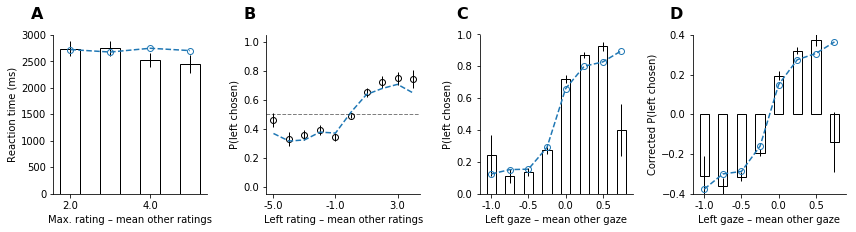

In [12]:
print('Close Figure to continue...')
glam.plot_fit(data, [glam_full.prediction]);
plt.show()